In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
data_diamonds = pd.read_csv("data/diamonds.csv", index_col= 0) 

In [5]:
data_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


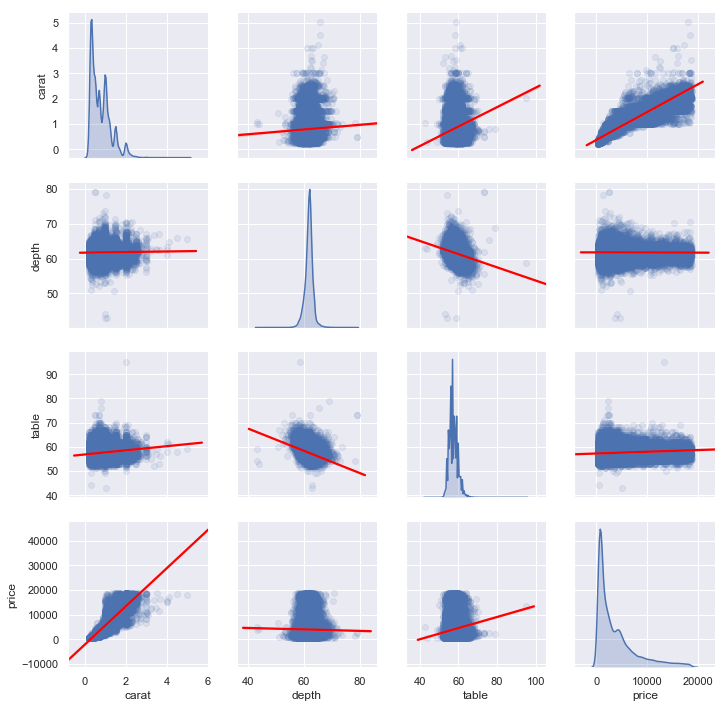

In [10]:
sns.set()
sns.pairplot(data_diamonds.iloc[:,:-3], kind='reg', diag_kind="kde",  plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

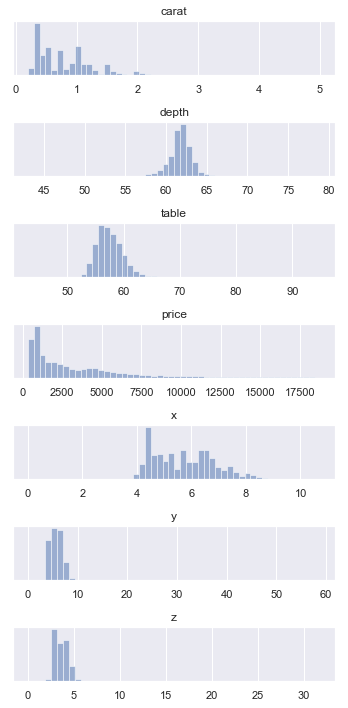

In [12]:
fig, axes = plt.subplots(7, 1, figsize=(5, 10))
ax = axes.ravel()
for i,j in enumerate([0,4,5,6,7,8,9]):
    f, bins = np.histogram(data_diamonds.iloc[:, j], bins=50)
    ax[i].hist(data_diamonds.iloc[:, j], bins=bins, alpha=.5)
    ax[i].set_title(data_diamonds.columns.values[j])
    ax[i].set_yticks(())
fig.tight_layout()

##### Удалим выбросы и нули по x, y, z

In [13]:
display(data_diamonds[data_diamonds.y>10])
data_wo_out = data_diamonds[data_diamonds.y<=10]

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [14]:
display(data_diamonds[data_diamonds.z>6])
data_wo_out = data_wo_out[data_wo_out.z<=6]

,carat,cut,color,clarity,depth,table,price,x,y,z
23645,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
24329,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26195,2.01,Fair,G,SI2,65.6,56.0,15562,7.89,7.84,6.16
26432,3.40,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27
26445,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26535,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43


In [15]:
display(data_diamonds[(data_diamonds['x']==0) | (data_diamonds['y']==0) | (data_diamonds['z']==0)])
data_wo_out = data_wo_out[~(data_wo_out['x']==0) & ~(data_wo_out['y']==0) & ~(data_wo_out['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [16]:
data_wo_out.describe()

,carat,depth,table,price,x,y,z
count,53905.000000,53905.000000,53905.000000,53905.000000,53905.000000,53905.000000,53905.000000
mean,0.797022,61.749025,57.456893,3928.242593,5.730708,5.732549,3.538790
std,0.471617,1.431737,2.233881,3983.527373,1.117866,1.109789,0.690439
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5320.000000,6.540000,6.540000,4.030000
max,3.240000,79.000000,95.000000,18823.000000,9.540000,9.460000,5.980000


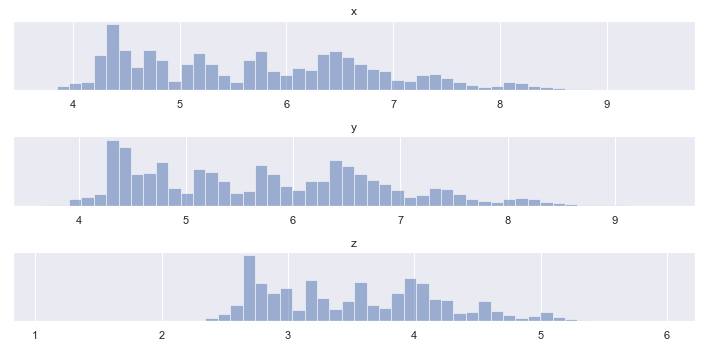

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(10, 5))
ax = axes.ravel()
for i,j in enumerate([7,8,9]):
    f, bins = np.histogram(data_wo_out.iloc[:, j], bins=50)
    ax[i].hist(data_wo_out.iloc[:, j], bins=bins, alpha=.5)
    ax[i].set_title(data_wo_out.columns.values[j])
    ax[i].set_yticks(())
fig.tight_layout()

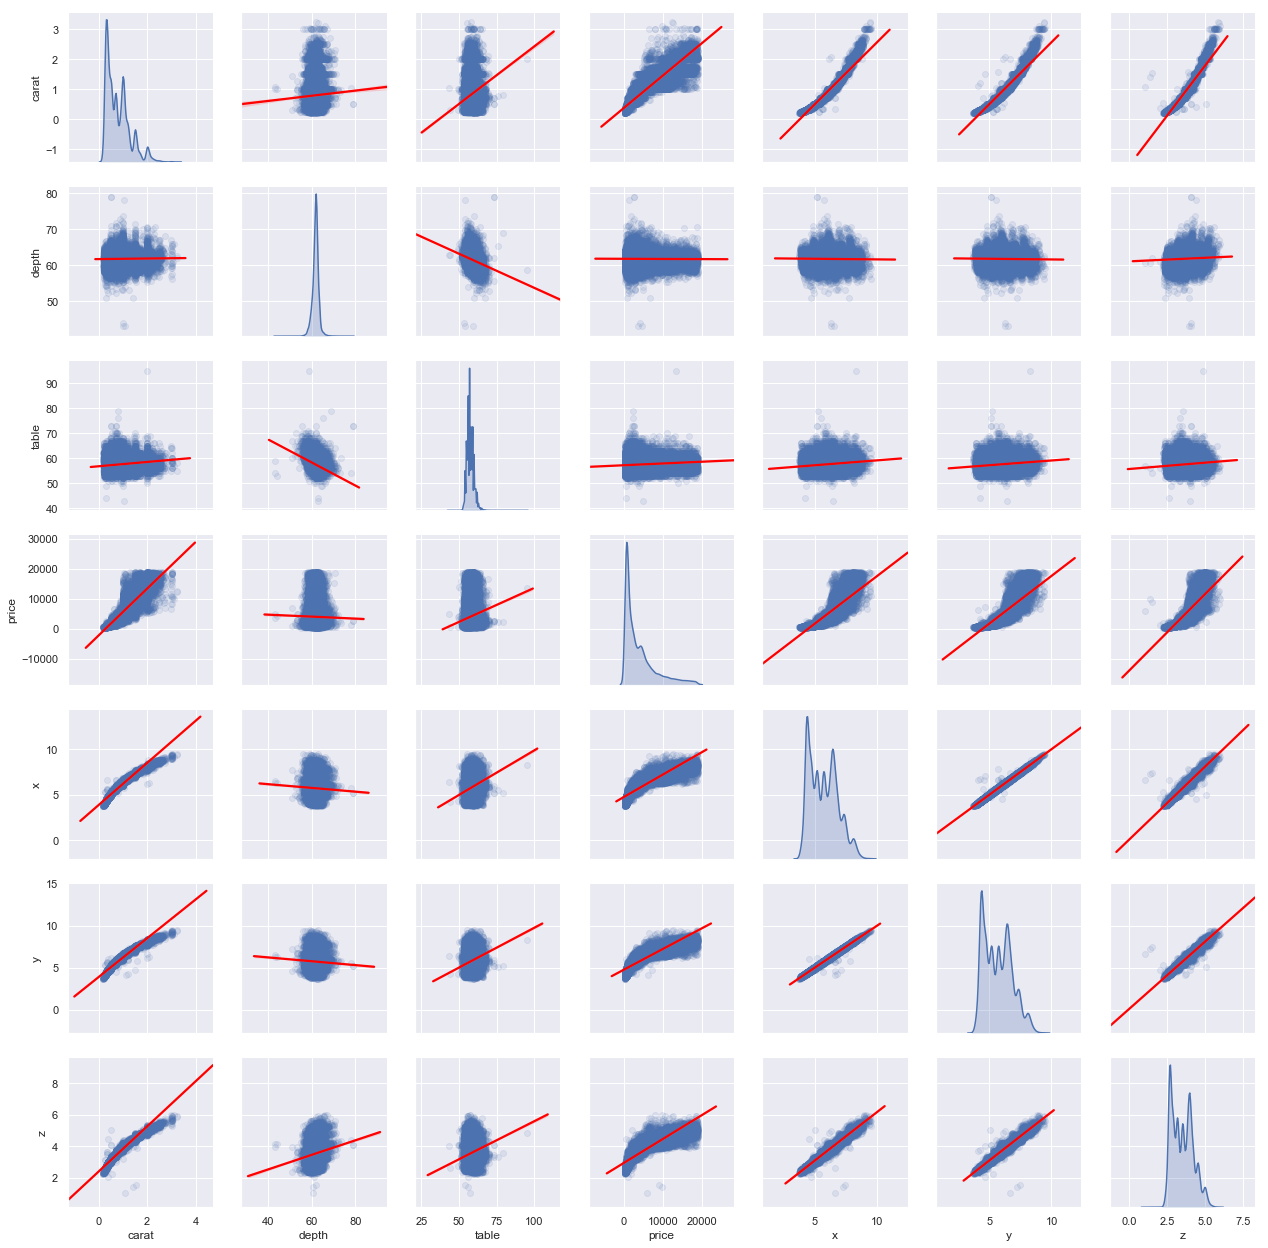

In [18]:
sns.set()
sns.pairplot(data_wo_out, kind='reg', diag_kind="kde",  plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

##### Создадим фичи объем и плотность алмаза

In [19]:
data_wo_out['volume'] = data_wo_out['x']*data_wo_out['y']*data_wo_out['z']

In [20]:
data_wo_out['density'] = data_wo_out['carat'] /data_wo_out['volume'] 

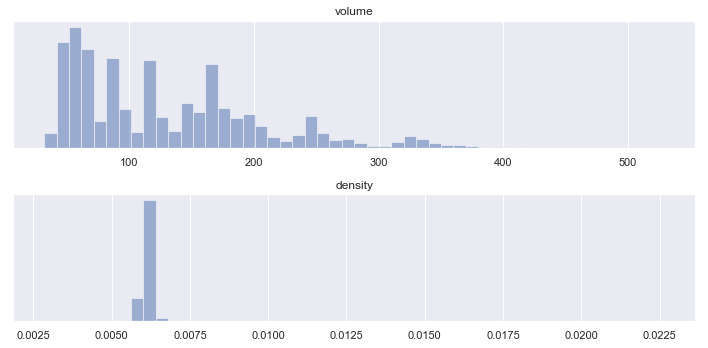

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
ax = axes.ravel()
for i,j in enumerate([-2,-1]):
    f, bins = np.histogram(data_wo_out.iloc[:, j], bins=50)
    ax[i].hist(data_wo_out.iloc[:, j], bins=bins, alpha=.5)
    ax[i].set_title(data_wo_out.columns.values[j])
    ax[i].set_yticks(())
fig.tight_layout()

##### Пометим алмазы с сомнительной плотностью

In [22]:
data_wo_out['bad'] = (data_wo_out['density'] < 0.0055)|(data_wo_out['density'] > 0.007)

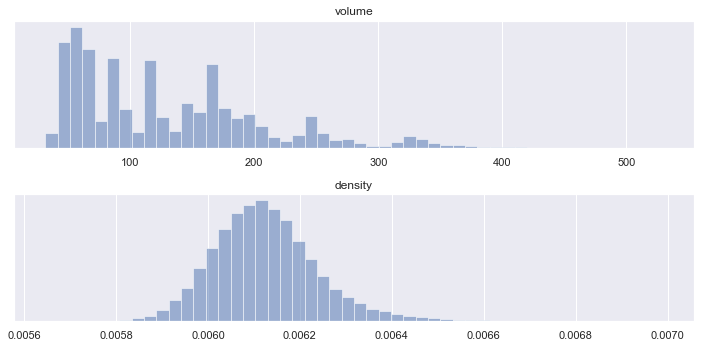

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
ax = axes.ravel()
for i,j in enumerate([-3,-2]):
    f, bins = np.histogram(data_wo_out[data_wo_out['bad'] == False].iloc[:, j], bins=50)
    ax[i].hist(data_wo_out[data_wo_out['bad'] == False].iloc[:, j], bins=bins, alpha=.5)
    ax[i].set_title(data_wo_out[data_wo_out['bad'] == False].columns.values[j])
    ax[i].set_yticks(())
fig.tight_layout()

In [ ]:
sns.set()
sns.pairplot(data_wo_out[data_wo_out['bad'] == False], kind='reg', diag_kind="kde",  plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

In [29]:
data_wo_out.loc[:,['x','y','z']]

TypeError: bad operand type for unary ~: 'list'

In [16]:
data_wo_out['bad'] = pd.get_dummies(data_wo_out['bad'],drop_first=True)

#### [Создадим факторные переменные  ](https://ggplot2.tidyverse.org/reference/diamonds.html)

##### Качество огранки (Fair, Good, Very Good, Premium, Ideal)

In [17]:
data_wo_out['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [18]:
data_wo_out['cut'] = data_wo_out['cut'].replace({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})

##### Прозрачность (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
    

In [19]:
data_wo_out['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [20]:
data_wo_out['clarity'] = data_wo_out['clarity'].replace({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

#####  Цвет (J (worst) to D (best))

In [21]:
data_wo_out['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

##### [Дамми по группам цвета](https://awesomegems.com/diamondfacts.html)

-  D-F - the finest & brightest colorless diamonds, usually for the discriminating customer who can afford the most beautiful and the rare.
- G-H - very white & bright face-up, near colorless diamonds that are not as expensive, and when mounted in jewelry it is difficult to see the the difference between these and the higher color grades.
- I-J - not quite as bright or have very slight hardly noticeable tint.


In [22]:
data_wo_out['color_group'] = data_wo_out['color'].replace({'D':2,'E':2,'F':2,'G':1,'H':1,'I':0,'J':0})

In [23]:
data_wo_out['color'] = data_wo_out['color'].replace({'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0})

In [24]:
dumdum = pd.get_dummies(data_wo_out['color_group'], drop_first=True)

In [25]:
data_wo_out = pd.concat([data_wo_out,dumdum], axis=1)

#####  Создадим бины по весу

In [26]:
data_ext = data_wo_out.copy()

In [27]:
np.array(data_ext['carat']).reshape(1, -1)

array([[0.23, 0.21, 0.23, ..., 0.7 , 0.86, 0.75]])

In [28]:
kb_ord = KBinsDiscretizer(n_bins=20, strategy='kmeans', encode='ordinal')
kb_ord.fit(data_ext[['carat']])
data_ord = kb_ord.transform(data_ext[['carat']])
data_ord[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [29]:
pd.value_counts(pd.Series(data_ord.flatten()))

0.0     11058
5.0      7983
2.0      7321
3.0      6520
1.0      6508
6.0      3500
4.0      3356
8.0      2632
7.0      1311
11.0     1211
9.0       767
10.0      757
12.0      432
13.0      243
14.0      143
15.0       95
18.0       26
16.0       24
17.0       15
19.0        3
dtype: int64

In [30]:
data_ext['carat_ord'] = data_ord

In [31]:
data_ext[data_ext['carat_ord']>=18.0]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density,bad,color_group,1,2,carat_ord
16284,3.00,2,2,0,63.1,55.0,6512,9.23,9.10,5.77,484.639610,0.006190,0,1,1,0,18.0
19340,3.01,3,1,0,62.7,58.0,8040,9.10,8.97,5.67,462.825090,0.006504,0,0,0,0,18.0
19347,3.00,0,2,0,67.1,57.0,8044,8.93,8.84,5.97,471.278964,0.006366,0,1,1,0,18.0
21759,3.11,0,0,0,65.9,57.0,9823,9.15,9.02,5.98,493.547340,0.006301,0,0,0,0,19.0
21863,3.01,3,4,0,62.2,56.0,9925,9.24,9.13,5.73,483.389676,0.006227,0,2,0,1,18.0
22429,3.05,3,5,0,60.9,58.0,10453,9.26,9.25,5.66,484.807300,0.006291,0,2,0,1,18.0
22541,3.02,0,1,0,65.2,56.0,10577,9.11,9.02,5.91,485.637702,0.006219,0,0,0,0,18.0
22742,3.01,0,2,0,56.1,62.0,10761,9.54,9.38,5.31,475.166412,0.006335,0,1,1,0,18.0
22832,3.00,1,1,0,57.0,64.0,10863,9.38,9.31,5.33,465.457174,0.006445,0,0,0,0,18.0
23540,3.00,1,5,0,64.2,65.0,11548,9.08,8.96,5.79,471.055872,0.006369,0,2,0,1,18.0


In [32]:
data_ext.shape

(53905, 17)

#####  Создадим полиномиальные фичи

In [33]:
num_feat = ['carat', 'volume', 'density', 'depth', 'table']

In [34]:
for i in num_feat:
    data_ext[i+'_log'] = np.log(data_ext[i])

In [35]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(data_ext[num_feat])
data_poly = poly.transform(data_ext[num_feat])
data_poly = pd.DataFrame(data_poly)
data_poly.columns = poly.get_feature_names()
data_poly.index = data_ext.index

In [54]:
data_ext = pd.concat([data_ext, data_poly.iloc[:,5:]], axis=1)

#### RANDOM FOREST

NameError: name 'sns' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
